<a href="https://colab.research.google.com/github/Voland24/ModernComputerVisionPytorch/blob/main/Chapter4_2_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data augmentation

In the previous chapter, we had a CNN guess correctly a class for an image that was translated by 5px. If we had moved the image more or applied some other transformation, there is a very low chance that the CNN would have guessed correctly.
Making a CNN imprevious to geometric or photometric changes is done by having the training set contain images that are rotated or translated or scaled or with different brightness. We apply these transformations to our original image and add all of these to the training set in order to improve our model.

We can:
  * rotate an image
  * zoom in our out i.e scale an image
  * introduce noise into the image
  * change the brightness
  * mirror or flip an image
  * shear an image




**augmenters** class in the imgaug package has useful functions for this.
Most prominent augmentations are:
* Affine transformations
* Brightness chnages
* Adding noise

# Affine transformations

These involve **translating**, **rotating**, ** scaling **, ** shearing** an image.
We can use the Affine method in the augmenters class for this.

In [1]:
from torchvision import datasets
import torch
data_folder = '/content/'
fmnist = datasets.FashionMNIST(data_folder, download = True, train = True)

tr_images = fmnist.data
tr_targets = fmnist.targets


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



Let's see the first image

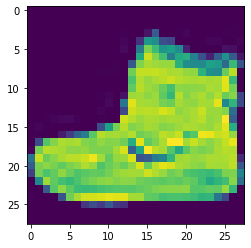

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(tr_images[0])


Let's perform the Affine transformations
First, scaling

Text(0.5, 1.0, 'Scaled image')

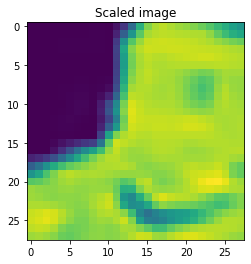

In [4]:
from imgaug import augmenters as iaa
import numpy as np
aug = iaa.Affine(scale = 2)
img = np.asarray(tr_images[0])
plt.imshow(aug.augment_image(img))
plt.title('Scaled image')

Translation

Text(0.5, 1.0, 'Translated image')

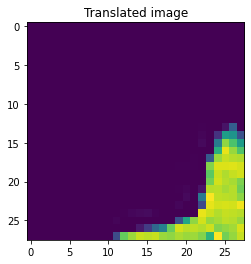

In [5]:
aug = iaa.Affine(translate_px = 10)
plt.imshow(aug.augment_image(np.asarray(tr_images[0])))
plt.title('Translated image')

The translation happened by both the x and y axis by 10px. We can specify differently if we choose so

Text(0.5, 1.0, 'Translated differently for x and y axis')

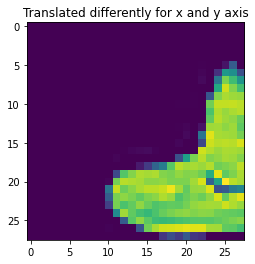

In [6]:
aug = iaa.Affine(translate_px={'x':10, 'y':2})
plt.imshow(aug.augment_image(np.asarray(tr_images[0])))
plt.title('Translated differently for x and y axis')


We can make the image after transformation fit the result better instead of the transformation causing some pixels to be cut out of the resulting image.

Text(0.5, 1.0, 'Shear by 30 degrees')

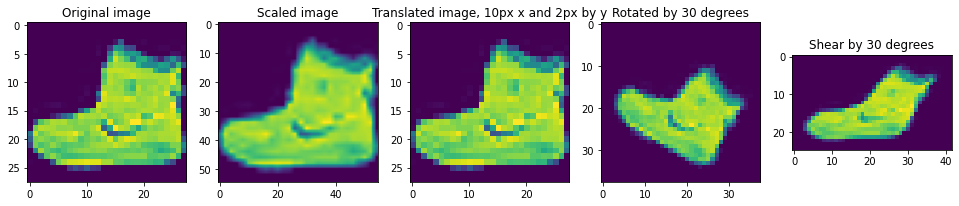

In [7]:
plt.figure(figsize = (20,20))
img = np.asarray(tr_images[0])
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale = 2, fit_output = True)
plt.imshow(aug.augment_image(img))
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10, 'y':2}, fit_output = True)
plt.imshow(aug.augment_image(img))
plt.title('Translated image, 10px x and 2px by y')
plt.subplot(164)
aug = iaa.Affine(rotate = 30, fit_output = True)
plt.imshow(aug.augment_image(img))
plt.title('Rotated by 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear = 30, fit_output = True)
plt.imshow(aug.augment_image(img))
plt.title('Shear by 30 degrees')

We can see that the translation is negated by the fact that we set **fit_output = True**. This is expected behaviour

There are new pixels created whe nwe rotated the image, they are by default 0, however we can set them to a different value in order to see them.

Text(0.5, 1.0, 'Rotation by 30 degrees')

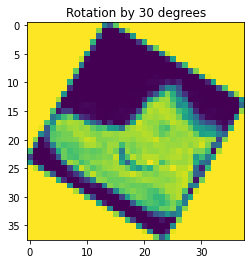

In [ ]:
aug = iaa.Affine(rotate = 30, fit_output = True, cval = 255)
plt.imshow(aug.augment_image(img))
plt.title('Rotation by 30 degrees')

There are also different modes of how we want the new pixel values to be filled, such as:
* constant - pads with constant value
* edge - pads with edge values of image
* symmetric - pads with reflection of image mirrored along the edge
* reflect - similar to symmetrci by it's on the first and last values of the image along each axis
* wrap - wraps the image along the axis

Text(0.5, 1.0, 'Rotation of image by \n30 degrees with wrap mode')

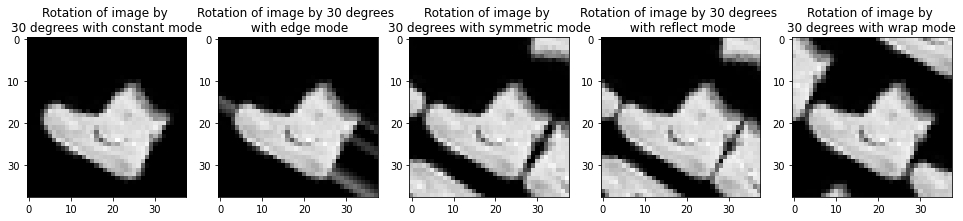

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(161)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image((img)), cmap='gray')
plt.title('Rotation of image by \n30 degrees with constant mode')
plt.subplot(162)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='edge')
plt.imshow(aug.augment_image((img)), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with edge mode')
plt.subplot(163)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='symmetric')
plt.imshow(aug.augment_image((img)), cmap='gray')
plt.title('Rotation of image by \n30 degrees with symmetric mode')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='reflect')
plt.imshow(aug.augment_image((img)), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with reflect mode')
plt.subplot(165)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='wrap')
plt.imshow(aug.augment_image((img)), cmap='gray')
plt.title('Rotation of image by \n30 degrees with wrap mode')

We will obvioulsy choose the constant mode for out FashionMNIST dataset.

# Brightness augmentations

This is applied when the difference between the background and the foreground is not as prominent. We have to train the model in as many scenarios as possible for it to perform well on the test data.

**Multiply** and **Linear contrast** are two different techniques applied to resolve these situations.
**Multiply** method will multiply the image pixels by a value that we specify.
**Linear contrast** does the following to the pixels **127 + alpha * (pixel - 127)**
When alpha is 1, it leaves the pixel unchanged. When it's smaller than 1, it will dim the brighter pixels and amplify the dimmer ones.

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

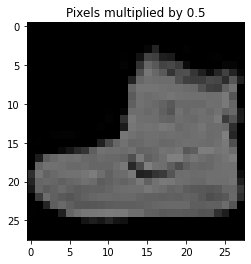

In [9]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 0.5')


Text(0.5, 1.0, 'Pixel contrast by 0.5')

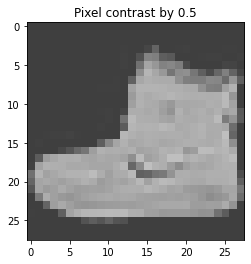

In [10]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Pixel contrast by 0.5')

We can also blur the image to mimic a more realistic scenario

Text(0.5, 1.0, 'Gaussian Blur of image with sigma of 1')

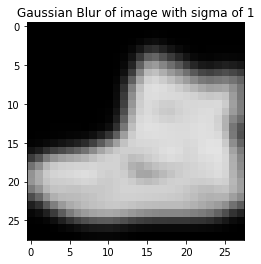

In [11]:
aug = iaa.GaussianBlur(sigma = 1)
plt.imshow(aug.augment_image(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Gaussian Blur of image with sigma of 1')

# Adding noise

In a real world situation, we could encounter a noisy signal i.e. image. We can mimic this with the Dropout and the SaltAndPepper filters.



Text(0.5, 1.0, 'Salt and pepper noise added')

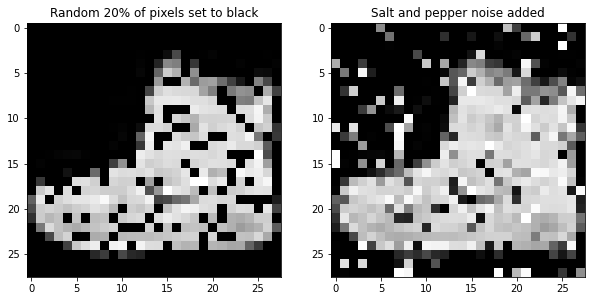

In [12]:
plt.figure(figsize = (10,10))
plt.subplot(121)
aug = iaa.Dropout(p = 0.2)
plt.imshow(aug.augment_image(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Random 20% of pixels set to black')
plt.subplot(122)
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Salt and pepper noise added')

We can perform multiple operations on a single image, as to more realistically mimic the real world scenario that could happen.

In [13]:
seq = iaa.Sequential([
    iaa.Dropout(p = 0.2),
    iaa.Affine(rotate = (-30,30))], random_order = True)

Text(0.5, 1.0, 'Result of two augmentation on the same image')

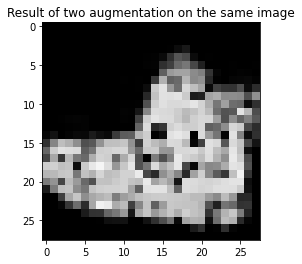

In [14]:
plt.imshow(seq.augment_image(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Result of two augmentation on the same image')

# Augmentations on a batch of images and collate_fn 

We can add the data augmentation in two places in the data pipeline.
In the __init__ method of the Dataset, and then  we will perform the same augmentations only once on the whole dataset i.e. we would have the same augmenations for all the iterations
Or, we can augment the data in the __getitem__ method, which is better since then we can have different augmentations for different iterations. However we will be performing the augmentations on one image at a time which is really slow.

What we what is to perform the same augmentation on a batch of images, so we get the best of both approaches.

We will translate the image between -10 and 10 pixels. One at a time and a batch of 32 and compare the time it took to complete

In [15]:
aug = iaa.Sequential([iaa.Affine(translate_px = {'x':(-10,10)}, mode = 'constant')])


One at a time

In [16]:
%%time
for i in range(32):
  aug.augment_image(np.asarray(tr_images[i]))
  

CPU times: user 28.4 ms, sys: 877 µs, total: 29.3 ms
Wall time: 31.3 ms


A batch at a time

In [17]:
%%time
aug.augment_images(np.asarray(tr_images[:32]))

CPU times: user 15.7 ms, sys: 0 ns, total: 15.7 ms
Wall time: 25.3 ms


array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,  40,  61, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,  43,  87, 168],
        [  0,   0,   0, ..., 255, 255, 217],
        [  0,   0,   0, ..., 204, 202, 201],
        ...,
        [  0,   0,   0, ..., 205, 204, 201],
        [  0,   0,   0, ..., 244, 244, 240],
        [  0,   0,   0, ..., 124, 125, 121]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   1,   0, ...,   0,   0,   0

Since the __getitem__ method in the Dataset class access the images on at a time, we have to add a new method called collate_fn which will allow us to manipulate a batch of images at once.

In [18]:
from torch.utils.data import Dataset,DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class FMNISTDataset(Dataset):
  def __init__(self, x, y, aug = None):
    self.x, self.y = x, y
    self.aug = aug
  def __getitem__(self, ix):
    x,y = self.x[ix], self.y[ix]
    return x, y
  def __len__(self): return len(self.x)
  def collate_fn(self, batch):
    imgs, classes = list(zip(*batch))
    if self.aug: # used so we can turn aug off for the validation dataset
      imgs = self.aug.augment_images(images = np.asarray(imgs))
      imgs = torch.tensor(imgs)[:,None, :, :].to(device)/ 255.
      classes = torch.tensor(classes).to(device)
      return imgs, classes

In [19]:
train = FMNISTDataset(tr_images, tr_targets, aug = aug)

trn_dl = DataLoader(train, batch_size = 64, collate_fn = train.collate_fn, shuffle = True)


This will allow us to perform the augmentation on a batch of images much quicker and allow for better training results and thus better models.

# Let's now see how the data augmentation helped with image classification


First, let's import the train and validation datasets

In [85]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_folder = '/content/'
fmnist = datasets.FashionMNIST(data_folder, download = True, train = True, transform=ToTensor())

tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder, download = True, train = False, transform=ToTensor())

val_images = val_fmnist.data
val_targets = val_fmnist.targets



Next, we create a class that performs random translations between -10 and 10 px on an image

In [86]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([iaa.Affine(translate_px = {'x' : (-10,10)}, mode = 'constant')])

class FMNISTDataset(Dataset):
    def __init__(self, x, y, aug=None):
        self.x, self.y = x, y
        self.aug = aug
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x, y
    def __len__(self): return len(self.x)

    def collate_fn(self, batch):
        'logic to modify a batch of images'
        ims, classes = list(zip(*batch))
        # transform a batch of images at once
        if self.aug: ims=self.aug.augment_images(images=np.asarray(ims))
        ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
        classes = torch.tensor(classes).to(device)
        return ims, classes


We now define the model's architecture

In [22]:
from torch.optim import SGD, Adam
def get_model():
  model = nn.Sequential(
      nn.Conv2d(1,64, kernel_size = 3),
      nn.MaxPool2d(2),
      nn.ReLU(),
      nn.Conv2d(64,128, kernel_size = 3),
      nn.MaxPool2d(2),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(3200, 256),
      nn.ReLU(),
      nn.Linear(256,10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = Adam(model.parameters(), lr = 1e-3)
  return model, loss_fn, optimizer




Since we will be training the model in batches of data, we will define the functions for that

In [23]:
def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

Next, we define the function used to fetch the train and validation data

In [87]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets, aug=aug)
    'notice the collate_fn argument'
    trn_dl = DataLoader(train, batch_size=64,
                collate_fn=train.collate_fn, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images),
                collate_fn=val.collate_fn, shuffle=True)
    return trn_dl, val_dl


We fetch the train and validation data, and get the model, optimizer and loss function

In [79]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

We train the model for 5 epochs

In [ ]:
for epoch in range(5):
  print(f"Epoch number {epoch + 1}")
  print(type(trn_dl))
  for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)